In [47]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

import re

In [48]:

import nltk

# تحميل الموارد المطلوبة مرة واحدة فقط
nltk.download('stopwords')   # الكلمات الشائعة
nltk.download('punkt')       # للتقطيع Tokenization
nltk.download('wordnet')     # لتصريف الكلمات Lemmatization



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#!pip install nltk

In [49]:
df = pd.read_csv('Dataset-SA.csv')
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,super!,great cooler excellent air flow and for this price its so amazing and unbelievablejust love it,positive
1,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,fair,the quality is good but the power of air is decent,positive
3,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,1,useless product,very bad product its a only a fan,negative
4,"Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)",3999,3,fair,ok ok product,neutral


In [50]:
data = df[['Review', 'Summary', 'Sentiment']]

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Review     180388 non-null  object
 1   Summary    205041 non-null  object
 2   Sentiment  205052 non-null  object
dtypes: object(3)
memory usage: 4.7+ MB


In [52]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [53]:
data[data['Review'].isnull()]

,Review,Summary,Sentiment
41625,NaN,best product,positive
41626,NaN,very good,positive
41627,NaN,very comfortablegood qualitylove it,positive
41628,NaN,very soft and comfortable go for it,positive
41629,NaN,super product quality is vry good tnx flipkart,positive
...,...,...,...
113340,NaN,ok oky hai according prise,positive
113341,NaN,nice,positive
113342,NaN,nice product,positive
113343,NaN,nice,positive


In [54]:
data.dropna(inplace=True)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_18184\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [55]:
data.isnull().sum()

Review       0
Summary      0
Sentiment    0
dtype: int64

In [56]:
# Combine Review and Summary
data['combined_text'] = data['Review'].astype(str) + " " + data['Summary'].astype(str)

# Preprocessing: Lowercase
data['combined_text'] = data['combined_text'].str.lower()


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_18184\3761592731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined_text'] = data['Review'].astype(str) + " " + data['Summary'].astype(str)
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_18184\3761592731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined_text'] = data['combined_text'].str.lower()


In [57]:
data.isnull().sum()

Review           0
Summary          0
Sentiment        0
combined_text    0
dtype: int64

In [58]:
data = data[['combined_text', 'Sentiment']]

In [15]:
data['Sentiment'].value_counts()

Sentiment
positive    147171
negative     24401
neutral       8807
Name: count, dtype: int64

In [59]:
pd.set_option('display.max_rows', 10)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)            # No limit for width
pd.set_option('display.max_colwidth', None)     # No limit for column content

In [60]:
data[data['Sentiment'] == 'neutral']

,combined_text,Sentiment
4,fair ok ok product,neutral
129,worst experience ever! average production,neutral
151,just okay speed is very slow,neutral
181,decent product built quality is not up to the mark overall avearge,neutral
189,fair cooling very late n water will come slowly,neutral
...,...,...
204761,good choice pure kaaaaj h,neutral
204896,pretty good honey finish,neutral
204908,nice quality is ok,neutral
204947,could be way better ok,neutral


In [61]:
data = data[data['Sentiment']!='neutral']

In [62]:
data['Sentiment'].value_counts()

Sentiment
positive    147171
negative     24401
Name: count, dtype: int64

### imbalance data
i will undersample the data because if i stay the countvectorizer will disagree beacuase memory 

In [63]:
from sklearn.utils import shuffle

# Assuming your dataframe is 'data' and the sentiment column is 'Sentiment'

# Separate majority and minority classes
positive_data = data[data['Sentiment'] == 'positive']
negative_data = data[data['Sentiment'] == 'negative']

# Undersample the majority class (positive sentiment)
positive_data_undersampled = positive_data.sample(n=negative_data.shape[0], random_state=42)

# Combine the undersampled majority class with the minority class
data_balanced = pd.concat([positive_data_undersampled, negative_data])

# Shuffle the balanced dataset to mix the classes
data_balanced = shuffle(data_balanced, random_state=42)

# Display the new class distribution
print(data_balanced['Sentiment'].value_counts())


Sentiment
positive    24401
negative    24401
Name: count, dtype: int64


In [64]:
# الحصول على 10 أرقام عشوائية من الـ index
random_indices = np.random.choice(data_balanced.index, size=10, replace=False)

# اختيار الـ 10 عينات بناءً على الأرقام العشوائية
random_samples = data_balanced.loc[random_indices]
random_samples

,combined_text,Sentiment
134032,hated it! very very very bad product,negative
135899,not good not as expected quality,negative
65553,awesome good product,positive
25043,horrible lt is not functioning as my need,negative
25564,fair setup if easy but usage is limited,negative
130689,not good dont buy this within 1 week the dry spin is not properly working,negative
17833,horrible not good product,negative
173862,fabulous! nice working performancegood quality,positive
91697,best in the market! quality is osm,positive
21745,good quality product good,positive


In [65]:
def process_review(text):
    # Get English stopwords
    stopwords_english = stopwords.words('english')
    
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lowercase the text
    text = text.lower()

    # Remove punctuation, numbers, etc.
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text (split it into words)
    text_tokens = text.split()

    # Initialize a list to hold processed words
    texts_clean = []

    # Process each word
    for word in text_tokens:
        # Check if the word is not a stopword
        if word not in stopwords_english:
            # Lemmatize the word
            lemmatiz_word = lemmatizer.lemmatize(word)
            texts_clean.append(lemmatiz_word)

    # Join the processed words back into a string
    return ' '.join(texts_clean)

# Example usage
review = "This is an amazing product with great value for money!"
processed_review = process_review(review)
print(processed_review)

amazing product great value money


In [66]:
data_balanced['clean_text'] = data_balanced['combined_text'].astype(str).apply(process_review)

In [67]:
#compare
data_balanced.head()

,combined_text,Sentiment,clean_text
20291,worth every penny good,positive,worth every penny good
147904,value-for-money best book but book stand not available with this product this is a cheating of customers,negative,valueformoney best book book stand available product cheating customer
124721,just wow! mind blowing purchasing,positive,wow mind blowing purchasing
118290,worst experience ever! sensor not working,negative,worst experience ever sensor working
90570,highly recommended usually boat product are always good,positive,highly recommended usually boat product always good


In [68]:
data_balanced.drop('combined_text', axis=1, inplace=True)

In [69]:
data_balanced.shape

(48802, 2)

In [ ]:
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Assuming 'data_balanced' is your DataFrame with 'clean_text' and 'Sentiment'
# X = data_balanced['clean_text']
# y = data_balanced['Sentiment']

# # Split into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Create DataFrame for test data
# test_data = pd.DataFrame({
#     'review': X_test,
#     'sentiment': y_test
# })

# # Save the test data to a CSV file
# test_data.to_csv('test_data.csv', index=False)

# print("Test data saved to 'test_data.csv'")


Test data saved to 'test_data.csv'


In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_balanced['clean_text'])  # Transform text to a matrix

# Convert to DataFrame for better readability
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display first few rows
print(vectorized_df.head())

   aa  aaa  aacha  aadhaar  aadhar  aaj  aan  aand  aanu  aap  aapyou  aare  \
0   0    0      0        0       0    0    0     0     0    0       0     0   
1   0    0      0        0       0    0    0     0     0    0       0     0   
2   0    0      0        0       0    0    0     0     0    0       0     0   
3   0    0      0        0       0    0    0     0     0    0       0     0   
4   0    0      0        0       0    0    0     0     0    0       0     0   

   aaro  aashish  aata  aavante  ab  abd  abdominal  abdulla  aberage  abidas  \
0     0        0     0        0   0    0          0        0        0       0   
1     0        0     0        0   0    0          0        0        0       0   
2     0        0     0        0   0    0          0        0        0       0   
3     0        0     0        0   0    0          0        0        0       0   
4     0        0     0        0   0    0          0        0        0       0   

   ability  abit  able  abnormal  abno

In [28]:
data_balanced['Sentiment']=data_balanced['Sentiment'].map({"positive":1, "negative":0})

In [29]:
x = vectorized_df.values
y = data_balanced['Sentiment']


In [30]:
x[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
y

20291     1
147904    0
124721    1
118290    0
90570     1
         ..
27986     1
172807    0
125994    0
186193    1
185728    1
Name: Sentiment, Length: 48802, dtype: int64

In [32]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [33]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      4881
           1       0.93      0.96      0.95      4880

    accuracy                           0.94      9761
   macro avg       0.95      0.94      0.94      9761
weighted avg       0.95      0.94      0.94      9761



In [34]:

# svm_model = SVC()
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
# print("SVM:\n", classification_report(y_test, y_pred_svm))


In [35]:

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))


Naive Bayes:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      4881
           1       0.91      0.97      0.94      4880

    accuracy                           0.93      9761
   macro avg       0.94      0.93      0.93      9761
weighted avg       0.94      0.93      0.93      9761



In [36]:
import joblib

# Save Logistic Regression model
joblib.dump(log_model, 'logistic_regression_model.pkl')


# Save Naive Bayes model
joblib.dump(nb_model, 'naive_bayes_model.pkl')



['naive_bayes_model.pkl']

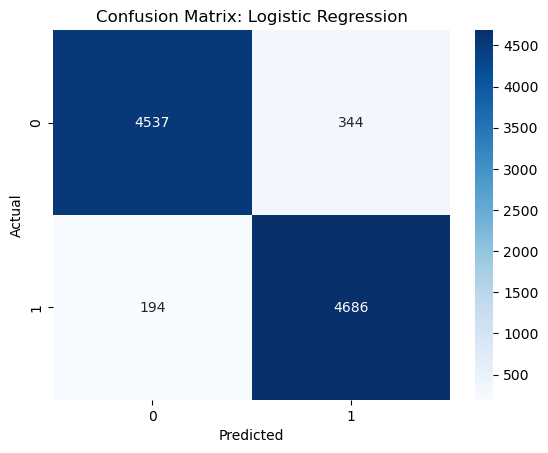

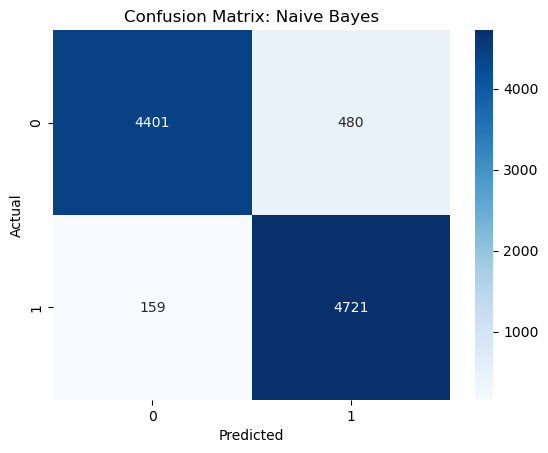

In [37]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for both models
plot_confusion(y_test, y_pred_log, "Logistic Regression")
plot_confusion(y_test, y_pred_nb, "Naive Bayes")


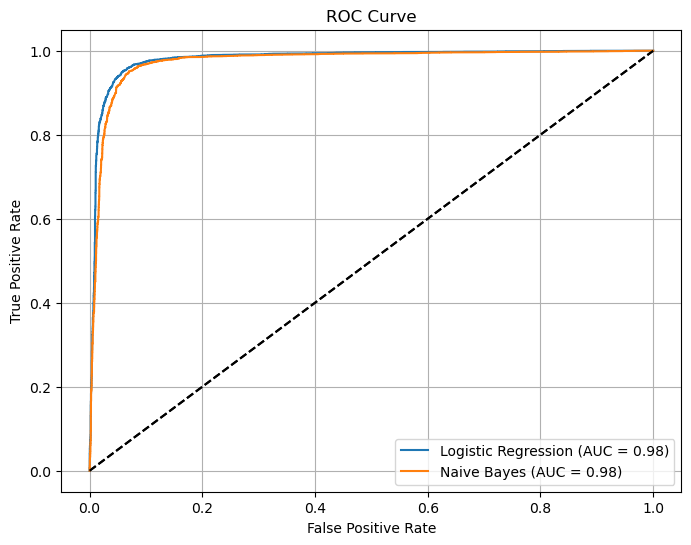

In [38]:
def plot_roc(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{title} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)

# Get probabilities
log_probs = log_model.predict_proba(X_test)[:, 1]
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# Plot both on the same figure
plt.figure(figsize=(8, 6))
plot_roc(y_test, log_probs, "Logistic Regression")
plot_roc(y_test, nb_probs, "Naive Bayes")
plt.show()


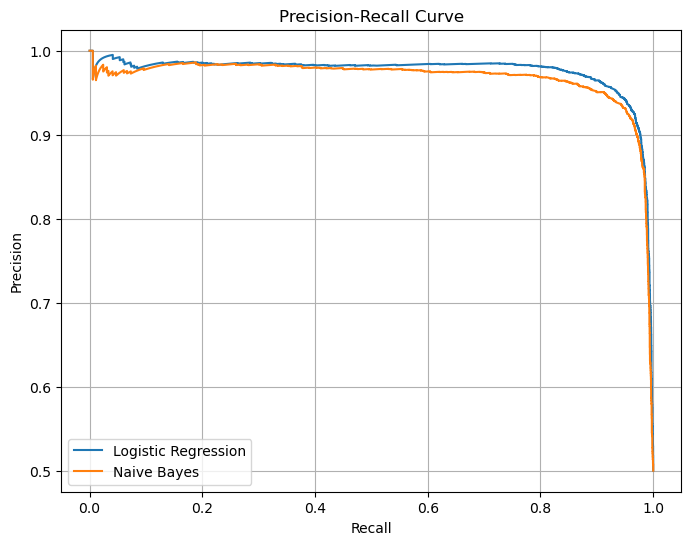

In [39]:
def plot_pr(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, label=title)

# Plot both
plt.figure(figsize=(8, 6))
plot_pr(y_test, log_probs, "Logistic Regression")
plot_pr(y_test, nb_probs, "Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# تقسيم البيانات إلى تدريب واختبار
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل البيانات إلى Tensors
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # تأكد من تحويل y إلى numpy array أو Series
X_val_tensor = torch.tensor(X_val.toarray(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)  # تأكد من تحويل y إلى numpy array أو Series

# تعريف نموذج ANN
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # الطبقة الأولى
        self.relu = nn.ReLU()  # دالة التفعيل
        self.fc2 = nn.Linear(128, 2)  # الطبقة الثانية مع عدد الفئات 2 (positive / negative)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# إنشاء نموذج ANN
input_dim = X.shape[1]  # عدد المميزات
model = ANNModel(input_dim)

# تحديد الخسارة والمُحسّن
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# تدريب النموذج
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# التقييم على مجموعة الاختبار
model.eval()
with torch.no_grad():
    predictions = model(X_val_tensor)
    _, predicted = torch.max(predictions, 1)

# عرض تقرير التصنيف
print("\nClassification Report:")
print(classification_report(y_val_tensor, predicted, target_names=['negative', 'positive']))

# حفظ النموذج
torch.save(model.state_dict(), "ann_model.pth")


Epoch 1/20, Loss: 0.6930
Epoch 2/20, Loss: 0.6857
Epoch 3/20, Loss: 0.6778
Epoch 4/20, Loss: 0.6686
Epoch 5/20, Loss: 0.6584
Epoch 6/20, Loss: 0.6473
Epoch 7/20, Loss: 0.6356
Epoch 8/20, Loss: 0.6234
Epoch 9/20, Loss: 0.6110
Epoch 10/20, Loss: 0.5983
Epoch 11/20, Loss: 0.5854
Epoch 12/20, Loss: 0.5723
Epoch 13/20, Loss: 0.5591
Epoch 14/20, Loss: 0.5458
Epoch 15/20, Loss: 0.5323
Epoch 16/20, Loss: 0.5188
Epoch 17/20, Loss: 0.5053
Epoch 18/20, Loss: 0.4919
Epoch 19/20, Loss: 0.4784
Epoch 20/20, Loss: 0.4651

Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.91      0.93      4873
    positive       0.92      0.95      0.93      4888

    accuracy                           0.93      9761
   macro avg       0.93      0.93      0.93      9761
weighted avg       0.93      0.93      0.93      9761

